In [1]:
from pymongo import MongoClient
import pandas as pd

client = MongoClient("mongodb://localhost:27017")
db = client["dota"]
matches_info = db["matches_info"]
heroes_collection = db["heroes"]

cursor = matches_info.find({}, {
    "match_id": 1,
    "radiant_win": 1,
    "players": 1,
    "game_mode": 1,
    "duration": 1
})

raw_data = list(cursor)
print(f"Завантажено {len(raw_data)} матчів")

Завантажено 44373 матчів


In [2]:

def extract_hero_features(player):
    return {
        "hero_id": player.get("hero_id"),
        "kda": player.get("kda", 0.0),
        "kills": player.get("kills", 0),
        "deaths": player.get("deaths", 0),
        "assists": player.get("assists", 0),
        "gold_per_min": player.get("gold_per_min", 0),
        "xp_per_min": player.get("xp_per_min", 0),
        "hero_damage": player.get("hero_damage", 0),
        "tower_damage": player.get("tower_damage", 0),
        "hero_healing": player.get("hero_healing", 0),
        "last_hits": player.get("last_hits", 0),
        "denies": player.get("denies", 0),
        "net_worth": player.get("net_worth", 0),
        "level": player.get("level", 0),
        "leaver_status": player.get("leaver_status", 0),
        "item_0": player.get("item_0", -1),
        "item_1": player.get("item_1", -1),
        "item_2": player.get("item_2", -1),
        "item_3": player.get("item_3", -1),
        "item_4": player.get("item_4", -1),
        "item_5": player.get("item_5", -1),
        "item_neutral": player.get("item_neutral", -1),
        "is_radiant": player.get("player_slot", 0) < 128
    }




In [3]:
def extract_benchmark_features(player):
    b = player.get("benchmarks", {})
    return {
        "hero_id": player.get("hero_id"),
        "kda_pct": b.get("kda", {}).get("pct", 0.0),
        "kills_per_min_pct": b.get("kills_per_min", {}).get("pct", 0.0),
        "gold_per_min_pct": b.get("gold_per_min", {}).get("pct", 0.0),
        "xp_per_min_pct": b.get("xp_per_min", {}).get("pct", 0.0),
        "hero_damage_per_min_pct": b.get("hero_damage_per_min", {}).get("pct", 0.0),
        "tower_damage_pct": b.get("tower_damage", {}).get("pct", 0.0),
        "hero_healing_per_min_pct": b.get("hero_healing_per_min", {}).get("pct", 0.0),
        "last_hits_per_min_pct": b.get("last_hits_per_min", {}).get("pct", 0.0),
    }

In [4]:
match = matches_info.find_one({"players.9": {"$exists": True}})
players = match["players"]
df = pd.DataFrame([extract_hero_features(p) for p in players])

df.head(10)

,hero_id,kda,kills,deaths,assists,gold_per_min,xp_per_min,hero_damage,tower_damage,hero_healing,...,level,leaver_status,item_0,item_1,item_2,item_3,item_4,item_5,item_neutral,is_radiant
0,108,3.86,3,6,24,537,666,13773,1200,0,...,22,0,90,108,206,180,178,242,949,True
1,74,2.22,2,8,18,367,491,15168,181,876,...,18,0,36,11,267,48,108,43,2193,True
2,84,2.20,2,9,20,410,515,13449,74,0,...,19,0,254,65,210,36,229,180,1602,True
3,11,2.71,10,6,9,620,862,24241,5814,0,...,24,0,48,1,1802,108,277,116,362,True
4,72,16.00,24,1,8,906,1277,66142,27551,0,...,28,0,156,108,154,139,63,141,1607,True
5,53,1.89,11,8,6,735,837,28915,7442,125,...,24,0,63,263,250,77,116,158,1159,False
6,97,2.83,8,5,9,487,632,22288,32,0,...,21,0,180,1,102,232,0,108,362,False
7,60,1.22,4,8,7,345,441,11658,86,0,...,17,1,50,939,116,73,40,73,1159,False
8,112,2.38,5,7,14,302,454,20943,131,5067,...,18,0,180,36,254,218,1,0,1159,False
9,100,0.86,2,13,10,208,438,10448,0,797,...,17,0,60,36,267,29,40,21,362,False


In [5]:
benchmark_features = [extract_benchmark_features(player) for player in match["players"]]
df_benchmarks = pd.DataFrame(benchmark_features)
df_benchmarks.head(10)

,hero_id,kda_pct,kills_per_min_pct,gold_per_min_pct,xp_per_min_pct,hero_damage_per_min_pct,tower_damage_pct,hero_healing_per_min_pct,last_hits_per_min_pct
0,108,0.0,0.380895,0.794438,0.628779,0.139057,0.426844,0.477630,0.852479
1,74,0.0,0.062869,0.165683,0.186349,0.116707,0.165162,0.988711,0.182181
2,84,0.0,0.203361,0.411402,0.297171,0.122953,0.264199,0.704318,0.209104
3,11,0.0,0.592757,0.658353,0.674411,0.394602,0.664845,0.890331,0.637513
4,72,0.0,0.980530,0.990654,0.993769,0.981308,0.997664,0.833333,0.957165
5,53,0.0,0.713583,0.783219,0.729085,0.504429,0.589321,0.666585,0.942175
6,97,0.0,0.697128,0.529373,0.421889,0.618146,0.198869,0.857920,0.778721
7,60,0.0,0.157244,0.116810,0.140022,0.120928,0.143018,0.922875,0.267316
8,112,0.0,0.622359,0.240171,0.284836,0.592137,0.342070,0.238299,0.414549
9,100,0.0,0.147527,0.031802,0.283569,0.166961,0.253534,0.951413,0.076855


In [6]:
matches_raw = list(matches_info.find({"players.9": {"$exists": True}}, limit=1000))

rows = []

for match in matches_raw:
    row = {
        "match_id": match["match_id"],
        "radiant_win": match.get("radiant_win", False)
    }

    rad_idx = 0
    dire_idx = 0

    for player in match["players"]:
        is_radiant = player.get("player_slot", 0) < 128
        side = "rad" if is_radiant else "dire"
        idx = rad_idx if is_radiant else dire_idx
        prefix = f"{side}{idx}_"

        if is_radiant:
            rad_idx += 1
        else:
            dire_idx += 1

        feats = extract_hero_features(player)
        bench = extract_benchmark_features(player)
        all_features = {**feats, **bench}
        for k, v in all_features.items():
            row[f"{prefix}{k}"] = v

    rows.append(row)

df_matches = pd.DataFrame(rows)

In [7]:
df_matches.head(20)

,match_id,radiant_win,rad0_hero_id,rad0_kda,rad0_kills,rad0_deaths,rad0_assists,rad0_gold_per_min,rad0_xp_per_min,rad0_hero_damage,...,dire4_item_neutral,dire4_is_radiant,dire4_kda_pct,dire4_kills_per_min_pct,dire4_gold_per_min_pct,dire4_xp_per_min_pct,dire4_hero_damage_per_min_pct,dire4_tower_damage_pct,dire4_hero_healing_per_min_pct,dire4_last_hits_per_min_pct
0,8196584301,True,108,3.86,3,6,24,537,666,13773,...,362,False,0.0,0.147527,0.031802,0.283569,0.166961,0.253534,0.951413,0.076855
1,8196584306,True,84,3.78,9,8,25,642,1131,74388,...,1602,False,0.0,0.450798,0.248973,0.457034,0.436654,0.313460,0.891255,0.263878
2,8196584312,True,68,2.11,7,18,33,347,670,30898,...,676,False,0.0,0.732606,0.607959,0.665212,0.961874,0.269961,0.833890,0.476252
3,8196584313,True,37,2.09,5,10,18,406,426,26785,...,949,False,0.0,0.309388,0.480085,0.559744,0.261735,0.193457,0.990754,0.546230
4,8196584314,True,27,2.53,9,16,34,498,894,47641,...,1608,False,0.0,0.297689,0.772401,0.978434,0.688062,0.836585,0.821181,0.659820
5,8196584315,True,93,2.67,23,14,17,761,1045,74371,...,1602,False,0.0,0.073639,0.201332,0.369761,0.108108,0.406189,0.690168,0.494320
6,8196584317,True,35,5.00,14,5,16,835,958,59856,...,1602,False,0.0,0.037985,0.183952,0.192702,0.113743,0.184806,0.509603,0.104567
7,8196584318,False,30,1.77,8,12,15,370,363,17112,...,949,False,0.0,0.400242,0.550826,0.477958,0.457809,0.572035,0.721406,0.208150
8,8196584319,True,43,14.00,15,1,13,697,729,29648,...,947,False,0.0,0.292426,0.034531,0.018228,0.043517,0.269961,0.821181,0.100000
9,8196584401,False,26,2.00,9,11,15,415,689,22767,...,1159,False,0.0,0.888629,0.877726,0.902648,0.742212,0.876168,0.833333,0.819315


In [8]:
rad_cols = [col for col in df_matches.columns if col.startswith("rad")]
dire_cols = [col for col in df_matches.columns if col.startswith("dire")]

df_matches["rad_avg_kda"] = df_matches[[c for c in rad_cols if c.endswith("_kda")]].mean(axis=1)
df_matches["dire_avg_kda"] = df_matches[[c for c in dire_cols if c.endswith("_kda")]].mean(axis=1)
df_matches["rad_avg_gpm"] = df_matches[[c for c in rad_cols if "gold_per_min" in c]].mean(axis=1)
df_matches["dire_avg_gpm"] = df_matches[[c for c in dire_cols if "gold_per_min" in c]].mean(axis=1)
df_matches["rad_avg_xpm"] = df_matches[[c for c in rad_cols if "xp_per_min" in c]].mean(axis=1)
df_matches["dire_avg_xpm"] = df_matches[[c for c in dire_cols if "xp_per_min" in c]].mean(axis=1)


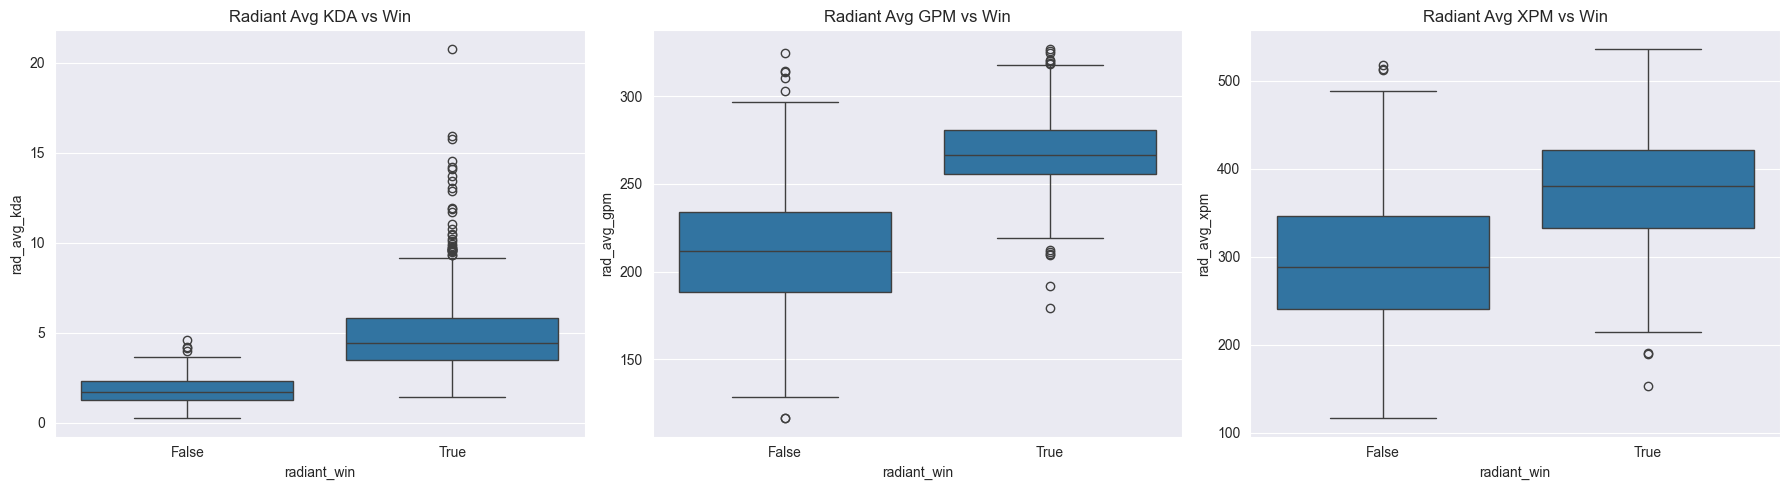

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(x="radiant_win", y="rad_avg_kda", data=df_matches, ax=axes[0])
axes[0].set_title("Radiant Avg KDA vs Win")

sns.boxplot(x="radiant_win", y="rad_avg_gpm", data=df_matches, ax=axes[1])
axes[1].set_title("Radiant Avg GPM vs Win")

sns.boxplot(x="radiant_win", y="rad_avg_xpm", data=df_matches, ax=axes[2])
axes[2].set_title("Radiant Avg XPM vs Win")

plt.tight_layout()
plt.show()


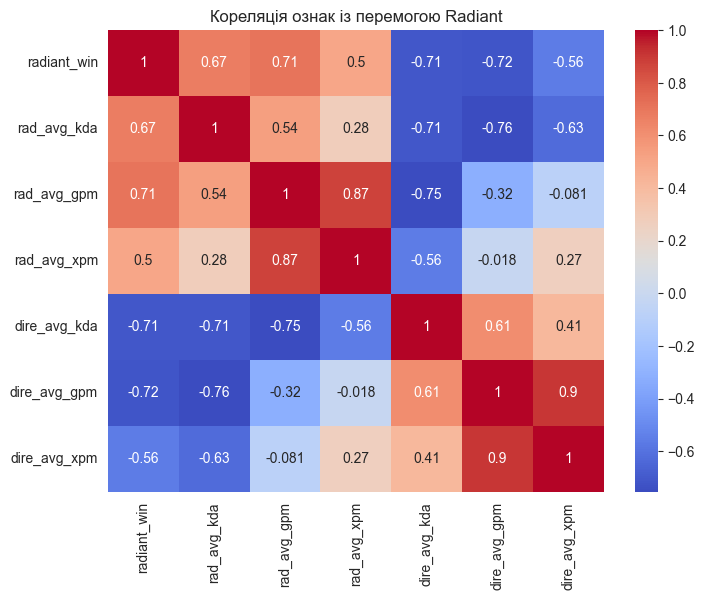

In [10]:
cols_for_corr = ["radiant_win", "rad_avg_kda", "rad_avg_gpm", "rad_avg_xpm",
                 "dire_avg_kda", "dire_avg_gpm", "dire_avg_xpm"]

corr_matrix = df_matches[cols_for_corr].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Кореляція ознак із перемогою Radiant")
plt.show()


In [105]:
features = [
    "gold_per_min", "xp_per_min", "kills_per_min", "last_hits_per_min",
    "hero_damage_per_min", "hero_healing_per_min", "tower_damage"
]

hero_benchmarks = {}

heroes_cursor = heroes_collection.find({}, {"_id": 0, "id": 1, **{f: 1 for f in features}})
df_heroes = pd.DataFrame(heroes_cursor)

for _, hero in df_heroes.iterrows():
    hero_id = hero["id"]
    hero_benchmarks[hero_id] = {}
    for f in features:
        value = hero.get(f)
        if isinstance(value, list) and len(value) > 5:
            hero_benchmarks[hero_id][f] = value[4]
        else:
            hero_benchmarks[hero_id][f] = None

def get_benchmark_raw(player: dict, feature: str) -> float:
    return player.get("benchmarks", {}).get(feature, {}).get("raw", 0)

def compute_relative_player(player: dict) -> dict | None:
    h_id = player.get("hero_id")

    if h_id not in hero_benchmarks:
        return None

    rel = {}
    for f in features:
        match_val  = get_benchmark_raw(player, f)
        global_val = hero_benchmarks[h_id][f]["value"]

        rel[f"rel_{f}"] = (
            (match_val - global_val) / global_val
            if global_val else 0
        )
    return rel

In [107]:
match_rows = []

for match in matches_raw:
    if "players" not in match or len(match["players"]) < 10:
        continue

    radiant_win = match.get("radiant_win")
    row = {
        "match_id": match["match_id"],
        "radiant_win": 1 if radiant_win is True else 0
    }

    rad_team = []
    dire_team = []

    for player in match["players"]:
        rel = compute_relative_player(player)
        if rel is None:
            break
        if player.get("player_slot", 0) < 128:
            rad_team.append(rel)
        else:
            dire_team.append(rel)

    for f in features:
        row[f"rad_avg_rel_{f}"]  = (
            sum(p.get(f"rel_{f}", 0) for p in rad_team) /
            max(len(rad_team), 1)
        )
        row[f"dire_avg_rel_{f}"] = (
            sum(p.get(f"rel_{f}", 0) for p in dire_team) /
            max(len(dire_team), 1)
        )

    match_rows.append(row)

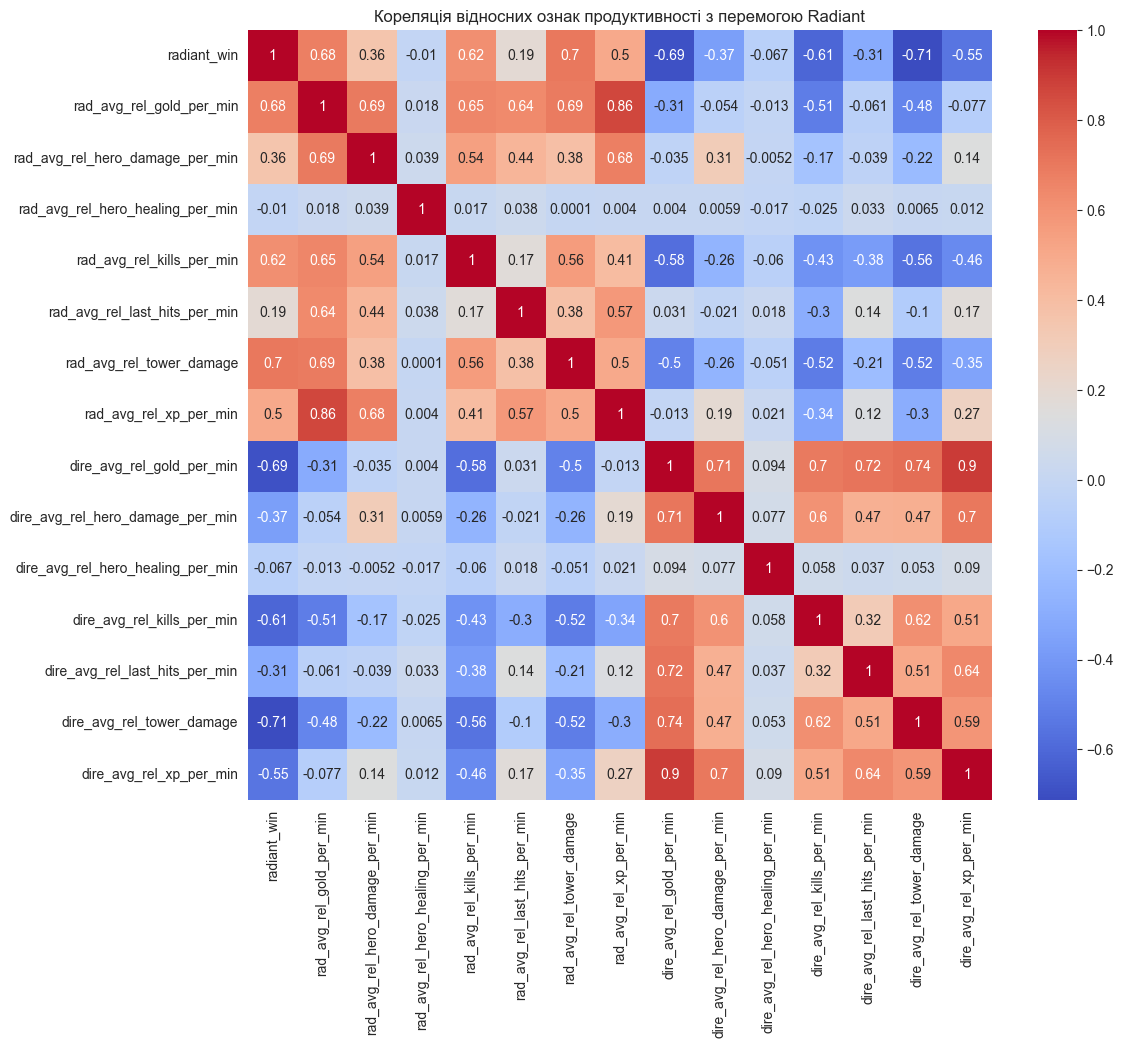

In [109]:

df_rel = pd.DataFrame(match_rows)

rad_cols = sorted([c for c in df_rel.columns if c.startswith("rad_avg")])
dire_cols = sorted([c for c in df_rel.columns if c.startswith("dire_avg")])
cols = ["radiant_win"] + rad_cols + dire_cols

corr = df_rel[cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Кореляція відносних ознак продуктивності з перемогою Radiant")
plt.show()
